In [7]:
# словарь данных процессоры
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
processor_name = ('Intel', 'AMD', 'Qualcomm', ' HiSilicon', 'Intel Atom', ' Samsung', 'Apple')
processor_df = pd.DataFrame(processor_name, columns=['Processor_name'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
processor_df['Processor_Types'] = labelencoder.fit_transform(processor_df['Processor_name'])
#processor_df['new'] = labelencoder.fit_transform(processor_df['Processor_name'])
processor_df['new'] = ('60', '120', '250', ' 80', '96', ' 74', '66')
processor_df

,Processor_name,Processor_Types,new
0,Intel,4,60
1,AMD,2,120
2,Qualcomm,6,250
3,HiSilicon,0,80
4,Intel Atom,5,96
5,Samsung,1,74
6,Apple,3,66


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing brodge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(processor_df[['Processor_Types']]).toarray())
# merge with main df processor_df on key values
processor_df = processor_df.join(enc_df)
processor_df

,Processor_name,Processor_Types,new,0,1,2,3,4,5,6
0,Intel,4,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AMD,2,120,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Qualcomm,6,250,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,HiSilicon,0,80,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Intel Atom,5,96,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Samsung,1,74,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,Apple,3,66,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
import pandas as pd
import numpy as np
processor_name = ('Intel', 'AMD', 'Qualcomm', ' HiSilicon', 'Intel Atom', ' Samsung', 'Apple')
processor_df = pd.DataFrame(processor_name, columns=['Processor_name'])
dum_df = pd.get_dummies(processor_df, columns=["Processor_name"], prefix=["Type_is"])
processor_df = processor_df.join(dum_df)
processor_df

,Processor_name,Type_is_ HiSilicon,Type_is_ Samsung,Type_is_AMD,Type_is_Apple,Type_is_Intel,Type_is_Intel Atom,Type_is_Qualcomm
0,Intel,False,False,False,False,True,False,False
1,AMD,False,False,True,False,False,False,False
2,Qualcomm,False,False,False,False,False,False,True
3,HiSilicon,True,False,False,False,False,False,False
4,Intel Atom,False,False,False,False,False,True,False
5,Samsung,False,True,False,False,False,False,False
6,Apple,False,False,False,True,False,False,False


In [11]:
classes = ['yes', 'no', 'maybe', 'no', 'yes']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(classes)

print(classes)
print(labels)

['yes', 'no', 'maybe', 'no', 'yes']
[2 1 0 1 2]


In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(classes)
print(classes)
print(labels)

['yes', 'no', 'maybe', 'no', 'yes']
[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


In [13]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from seaborn import load_dataset
from seaborn import get_dataset_names
# 2
print("Dataset\n")
cont=0
for dataset_name in get_dataset_names():
  cont+=1
  print(cont,".", dataset_name)
# 3
data=load_dataset("car_crashes")
data.head(3)


Dataset

1 . anagrams
2 . anscombe
3 . attention
4 . brain_networks
5 . car_crashes
6 . diamonds
7 . dots
8 . dowjones
9 . exercise
10 . flights
11 . fmri
12 . geyser
13 . glue
14 . healthexp
15 . iris
16 . mpg
17 . penguins
18 . planets
19 . seaice
20 . taxis
21 . tips
22 . titanic


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


In [14]:
# 4
data.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [15]:
# 5
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [16]:
# 6
data.sample(6)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
29,11.6,4.060,3.480,10.092,9.628,746.54,120.21,NH
35,14.1,3.948,4.794,13.959,11.562,697.73,133.52,OH
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
16,17.8,4.806,4.272,13.706,15.130,780.45,133.80,KS


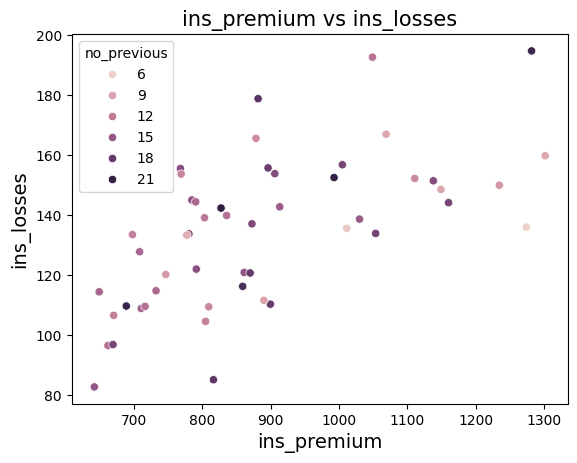

In [17]:
# 7
sns.scatterplot(x='ins_premium', y='ins_losses', hue='no_previous', data=data)
plt.title('ins_premium vs ins_losses', fontsize=15)
plt.xlabel('ins_premium', fontsize=14)
plt.ylabel('ins_losses', fontsize=14)
plt.show()

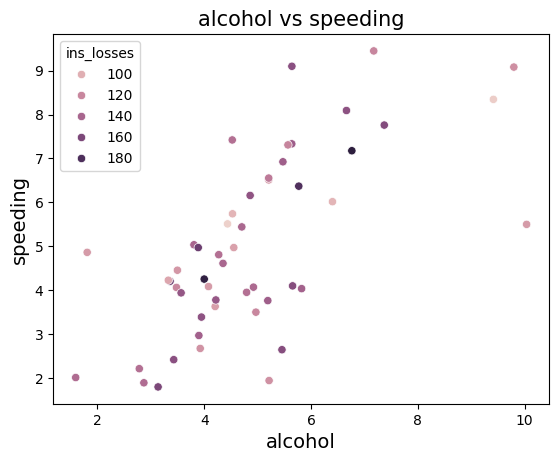

In [24]:
# 8
sns.scatterplot(x='alcohol', y='speeding', hue='ins_losses', data=data)
plt.title('alcohol vs speeding', fontsize=15)
plt.xlabel('alcohol', fontsize=14)
plt.ylabel('speeding', fontsize=14)
plt.show()

In [31]:
# 9
abbrev = data.abbrev.unique()
print("Different Classes in ins_losses feature:",*abbrev)
alcohol=data.alcohol.unique()
print("Different Classes in alcohol feature:",*alcohol)
speeding=data.speeding.unique()
print("Different Classes in speeding feature:",*speeding)

Different Classes in ins_losses feature: AL AK AZ AR CA CO CT DE DC FL GA HI ID IL IN IA KS KY LA ME MD MA MI MN MS MO MT NE NV NH NJ NM NY NC ND OH OK OR PA RI SC SD TN TX UT VT VA WA WV WI WY
Different Classes in alcohol feature: 5.64 4.525 5.208000000000001 5.824 3.36 3.808 3.888 4.86 1.5930000000000002 5.190999999999999 3.9 7.175 4.437 4.352 4.205 3.925 4.272 4.922 6.765 4.53 4.0 2.87 3.948 2.784 5.456 5.474000000000001 9.416 5.215 4.704 3.48 3.136 4.968 3.5670000000000006 10.038 4.794 5.770999999999999 3.3280000000000003 5.642 4.218 9.799 6.401999999999999 5.655 7.371999999999999 1.808 4.08 3.429 3.498 6.664 4.554 5.568
Different Classes in speeding feature: 7.332000000000001 7.421 6.51 4.032 4.2 5.032 4.968 6.156000000000001 2.006 3.759 2.964 9.45 5.508000000000001 4.6080000000000005 3.625 2.669 4.806 4.066 7.175 5.738 4.25 1.886 3.384 2.208 2.64 6.923000000000001 8.345999999999998 1.9370000000000005 5.439 4.06 1.7919999999999998 3.496 3.936 6.5520000000000005 5.496999999999999 3

In [37]:
# 10
#Method 1
def CutEncoding(cut):
  value=-1
  if(abbrev.any()=="FL"):
    value=4
  elif(abbrev.any()=="KY"):
    value=3
  elif(abbrev.any()=="NY"):
    value=2
  elif(abbrev.any()=="WA"):
    value=1 
  elif(abbrev.any()=="AL"):
    value=0
  return value
print("Cut Feature Before Encoding:",*data['abbrev'].unique())
data['abbrev']=data['abbrev'].apply(lambda x:CutEncoding(x))
print("Cut Feature After Encoding:",*data['abbrev'].unique())

Cut Feature Before Encoding: AL AK AZ AR CA CO CT DE DC FL GA HI ID IL IN IA KS KY LA ME MD MA MI MN MS MO MT NE NV NH NJ NM NY NC ND OH OK OR PA RI SC SD TN TX UT VT VA WA WV WI WY
Cut Feature After Encoding: 0


In [43]:
#Method 2 -- Color feature
ColorEncoder=LabelEncoder()
print("alcohol Feature Before Encoding:",*data['alcohol'].unique())
data.alcohol=ColorEncoder.fit_transform(data.alcohol)
print("alcohol Feature After Encoding:",*data['alcohol'].unique())

alcohol Feature Before Encoding: 5.64 4.525 5.208000000000001 5.824 3.36 3.808 3.888 4.86 1.5930000000000002 5.190999999999999 3.9 7.175 4.437 4.352 4.205 3.925 4.272 4.922 6.765 4.53 4.0 2.87 3.948 2.784 5.456 5.474000000000001 9.416 5.215 4.704 3.48 3.136 4.968 3.5670000000000006 10.038 4.794 5.770999999999999 3.3280000000000003 5.642 4.218 9.799 6.401999999999999 5.655 7.371999999999999 1.808 4.08 3.429 3.498 6.664 4.554 5.568
alcohol Feature After Encoding: 37 23 32 41 6 11 12 28 0 31 13 45 22 21 18 14 20 29 44 24 16 3 15 2 34 35 47 33 26 8 4 30 10 49 27 40 5 38 19 48 42 39 46 1 17 7 9 43 25 36


In [ ]:
#Method 3 -- Clarity feature
data.head(3)
data=pd.get_dummies(data=data,columns=['clarity'])
data.head(3)

,carat,cut,color,depth,table,price,x,y,z,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,0,0,0,0,0,0,1,0
1,0.21,3,1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,0,0,1,0,0
2,0.23,2,1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,1,0,0,0,0


In [ ]:
df=load_dataset('iris')
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
48,5.3,3.7,1.5,0.2,setosa
96,5.7,2.9,4.2,1.3,versicolor


In [ ]:
encoder=LabelEncoder()
print("Classes before encoding:",df.species.unique())
df['species']=encoder.fit_transform(df['species'])
print("Classes after encoding:",df.species.unique())

Classes before encoding: ['setosa' 'versicolor' 'virginica']
Classes after encoding: [0 1 2]


In [ ]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
103,6.3,2.9,5.6,1.8,2
81,5.5,2.4,3.7,1.0,1
121,5.6,2.8,4.9,2.0,2


In [ ]:
col,rows=data.shape
print("" ,data.shape)

 (51, 8)


In [ ]:
print("", round(data.isnull().sum().sum()/rows,2))

 0.0
